In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd

In [22]:
#Preparing for data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

#Scalar
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [24]:
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
z_test = model1.predict(X_test)

In [26]:
def accuracy(y_test, z_test):
  n_corr = 0
  for i in range(len(z_test)):
    if z_test[i] == y_test[i]:
      n_corr += 1
  acc = n_corr / len(z_test)
  return acc

In [27]:
print(f"Accuracy = {accuracy(y_test, z_test):.4f}") 

Accuracy = 0.9386


In [28]:
report = classification_report(y_test, z_test, labels=[0, 1], target_names=["Benign", "Malignant"], output_dict=True)

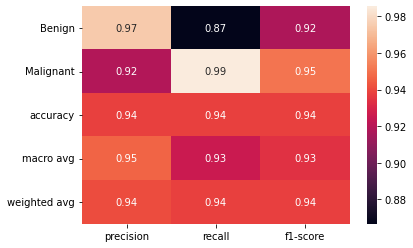

In [29]:
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

In [34]:
#Feature Selection using PCA and select only 2
pca = PCA(n_components = 2)
pca.fit(X)
X_transform = X
X_transform = pca.transform(X_transform)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size = 0.2, random_state = 1234)

#Scalar
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [36]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
z_test = model2.predict(X_test)

In [39]:
print(f"Accuracy = {accuracy(y_test, z_test):.4f}") 

Accuracy = 0.9298


In [40]:
report = classification_report(y_test, z_test, labels=[0, 1], target_names=["Benign", "Malignant"], output_dict=True)

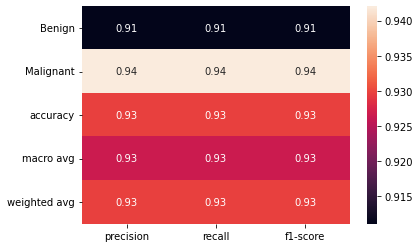

In [41]:
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)